In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, accuracy_score, precision_score, \
        recall_score, f1_score, precision_recall_curve
from sklearn import preprocessing
import duckdb

<Axes: xlabel='diff', ylabel='A_won'>

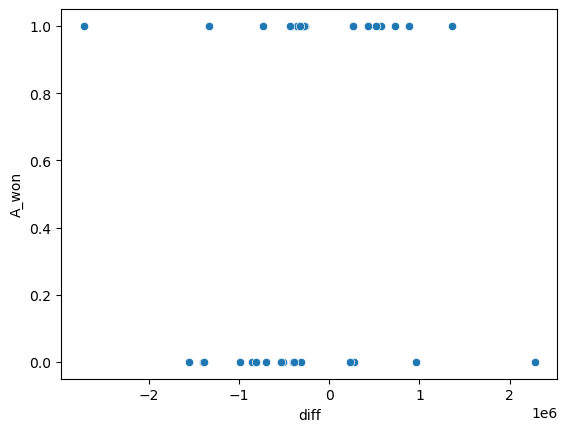

In [279]:
data = pd.read_csv('campaign_csvs/people_visited_comparison.csv')

data = duckdb.sql("""SELECT *, visits_A - visits_B AS diff FROM data WHERE visits_A > 0 AND visits_B > 0
                  AND ABS(diff) > 200000""").df()

sns.scatterplot(data, x='diff',y='A_won')

In [280]:
model = LogisticRegression().fit(data['diff'].values.reshape(-1,1), data['A_won'].values.reshape(-1,1))

c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='diff', ylabel='predictions'>

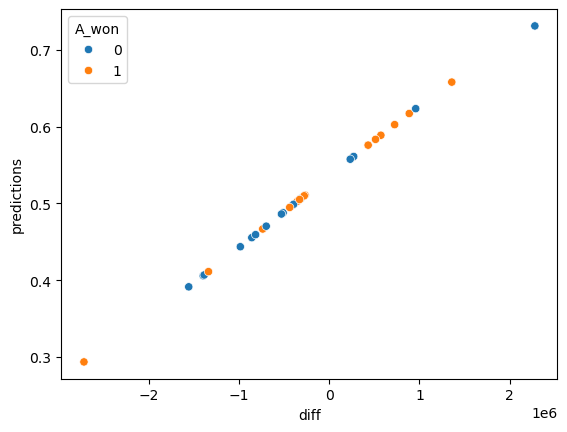

In [281]:
data['predictions'] = model.predict_proba(data['diff'].values.reshape(-1,1))[:,1]
sns.scatterplot(data, x='diff',y='predictions', hue='A_won')

In [285]:

prediction_data = pd.read_csv('campaign_csvs/election_prediction.csv')

election_2004 = duckdb.sql("""SELECT state, evotes, Bush_2004, Kerry_2004, diff_2004 FROM prediction_data
                           WHERE Bush_2004 > 0 AND Kerry_2004 > 0 AND NOT(state = 'District of Columbia')
                           AND NOT(state = 'New York')""").df()

election_2004['evotes_2004'] = election_2004['evotes']*model.predict_proba(election_2004['diff_2004'].values.reshape(-1,1))[:,1]
bush_votes = np.sum(election_2004['evotes_2004'])
kerry_votes = np.sum(election_2004['evotes'])-np.sum(election_2004['evotes_2004'])
print(f'Bush: {bush_votes}')
print(f'Kerry: {kerry_votes}')

election_2008 = duckdb.sql("""SELECT state, evotes, Obama_2008, Mccain_2008, diff_2008 FROM prediction_data
                           WHERE Obama_2008 > 0 AND Mccain_2008 > 0""").df()

election_2008['evotes_2008'] = election_2008['evotes']*model.predict_proba(election_2008['diff_2008'].values.reshape(-1,1))[:,1]
obama_votes = np.sum(election_2008['evotes_2008'])
mccain_votes = np.sum(election_2008['evotes'])-np.sum(election_2008['evotes_2008'])
print(f'Obama: {obama_votes}')
print(f'McCain: {mccain_votes}')

election_2012 = duckdb.sql("""SELECT state, evotes, Obama_2012, Romney_2012, diff_2012 FROM prediction_data
                           WHERE Obama_2012 > 0 AND Romney_2012 > 0""").df()

election_2012['evotes_2012'] = election_2012['evotes']*model.predict_proba(election_2012['diff_2012'].values.reshape(-1,1))[:,1]
obama_votes = np.sum(election_2012['evotes_2012'])
romney_votes = np.sum(election_2012['evotes'])-np.sum(election_2012['evotes_2012'])
print(f'Obama: {obama_votes}')
print(f'Romney: {romney_votes}')

election_2016 = duckdb.sql("""SELECT state, evotes, Trump_2016, Clinton_2016, diff_2016 FROM prediction_data
                           WHERE Trump_2016 > 0 AND Clinton_2016 > 0""").df()

election_2016['evotes_2016'] = election_2016['evotes']*model.predict_proba(election_2016['diff_2016'].values.reshape(-1,1))[:,1]
trump_votes = np.sum(election_2016['evotes_2016'])
clinton_votes = np.sum(election_2016['evotes'])-np.sum(election_2016['evotes_2016'])
print(f'Trump: {trump_votes}')
print(f'Clinton: {clinton_votes}')

election_2020 = duckdb.sql("""SELECT state, evotes, Trump_2020, Biden_2020, diff_2020 FROM prediction_data
                           WHERE Trump_2020 > 0 AND Biden_2020 > 0""").df()

election_2020['evotes_2020'] = election_2020['evotes']*model.predict_proba(election_2020['diff_2020'].values.reshape(-1,1))[:,1]
biden_votes = np.sum(election_2020['evotes_2020'])
trump_votes = np.sum(election_2020['evotes'])-np.sum(election_2020['evotes_2020'])
print(f'Biden: {biden_votes}')
print(f'Trump: {trump_votes}')

election_2024 = duckdb.sql("""SELECT state, evotes, Trump_2024, Harris_2024, Harris_2024 - Trump_2024 AS diff_2024 FROM prediction_data
                           WHERE Trump_2024 > 0 AND Harris_2024 > 0""").df()

election_2024['evotes_2024'] = election_2024['evotes']*model.predict_proba(election_2024['diff_2024'].values.reshape(-1,1))[:,1]
harris_votes = np.sum(election_2024['evotes_2024'])
trump_votes = np.sum(election_2024['evotes'])-np.sum(election_2024['evotes_2024'])
print(f'Harris: {harris_votes}')
print(f'Trump: {trump_votes}')


Bush: 94.43533480537715
Kerry: 81.56466519462285
Obama: 98.5129460724029
McCain: 76.4870539275971
Obama: 48.835117351492826
Romney: 46.164882648507174
Trump: 93.64351410314691
Clinton: 62.35648589685309
Biden: 85.12922109147212
Trump: 71.87077890852788
Harris: 51.50825482160719
Trump: 41.49174517839281


c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nikhi\anaconda3\envs\info2950FA24\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

   filter  accuracy  count
0       0      0.58     59
1   10000      0.59     56
2   20000      0.59     56
3   30000      0.58     55
4   40000      0.58     53


<Axes: xlabel='filter', ylabel='accuracy'>

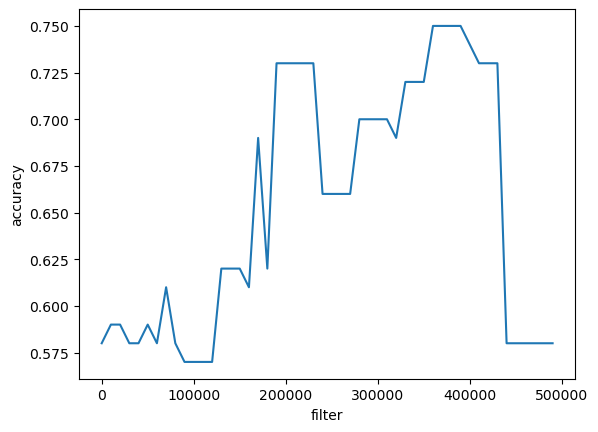

In [286]:
data_binary = pd.read_csv('campaign_csvs/people_visited_comparison.csv')

data_binary = duckdb.sql("""SELECT *, visits_A - visits_B AS diff FROM data_binary WHERE visits_A > 0 AND visits_B > 0""").df()

filter = []
accuracy = []
count = [] 

for i in range(0, 500000, 10000):
    data_binary = data_binary[abs(data_binary['diff']) > i]

    model_binary = LogisticRegression().fit(data_binary['diff'].values.reshape(-1,1), 
                                        data_binary['A_won'].values.reshape(-1,1))

    data_binary['predictions'] = model_binary.predict(data_binary['diff'].values.reshape(-1,1))
    filter.append(i)
    accuracy.append(round(accuracy_score(data_binary[['predictions']], data_binary[['A_won']]),2))
    count.append(len(data_binary))
    # print(f'Filter: {i} Accuracy: {round(accuracy_score(data_binary[['predictions']], data_binary[['A_won']]),2)},\
    #       Count: {len(data_binary)}')

df = pd.DataFrame({'filter':filter,'accuracy':accuracy, 'count':count})
print(df.head())
sns.lineplot(df, x='filter',y='accuracy')